In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [22]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [23]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [24]:
rfr_mod = RandomForestRegressor(n_estimators=200,max_depth= 8, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)


In [25]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=np.sqrt(mean_squared_error(y_test,rfr_pred))
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5) 
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

Random Forest Regression Model Score  :  0.883
R Sq. Value :  0.87
Adjusted R Sq. Value is :  0.855
Mean Square Error is :  0.024
Root Mean Square Error is :  0.156
Mean Absoulue Error is :  0.111
Accuracy : 81.99 %


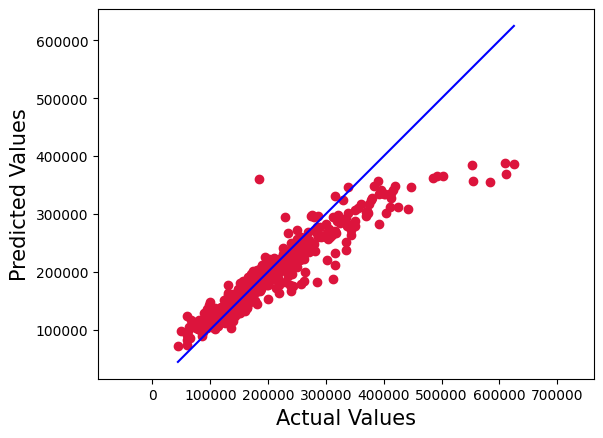

In [26]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\revex\AppData\Local\Temp\ipykernel_15732\1606234793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


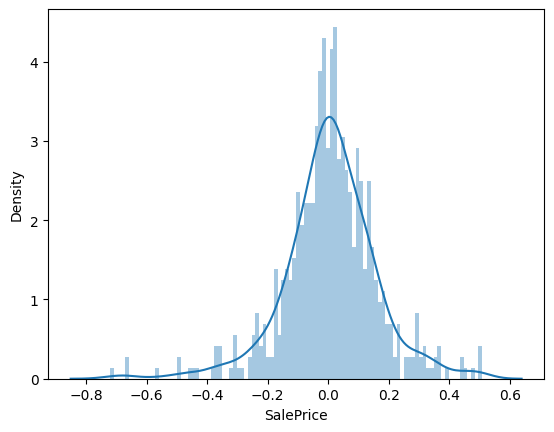

In [27]:
sb.distplot((y_test-rfr_pred),bins=100); 

In [28]:
param_grid = { 
    'n_estimators': [100,300,500],
    'max_depth' : [2,6,10],
    'max_features' : [1,5,9],
}

In [29]:
G_CV_rfc = GridSearchCV(estimator=rfr_mod, param_grid=param_grid, cv= 5) 
# using grid search method to optimise model with hyperparameter tuning

G_CV_rfc.fit(x_train, y_train)# fitting the model
G_CV_rfc.best_params_ # displaying optimised parameters for optimal tuning of model

{'max_depth': 10, 'max_features': 9, 'n_estimators': 500}

{'max_depth': 10, 'max_features': 9, 'n_estimators': 300}

In [30]:
rfr_mod = RandomForestRegressor(n_estimators=300,max_depth= 10, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)

In [31]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=np.sqrt(mean_squared_error(y_test,rfr_pred))
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5) 
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") 
# Accuracy of moadel based on parameter supplied by GridsearchCV

Random Forest Regression Model Score  :  0.921
R Sq. Value :  0.88
Adjusted R Sq. Value is :  0.872
Mean Square Error is :  0.021
Root Mean Square Error is :  0.147
Mean Absoulue Error is :  0.102
Accuracy : 84.41 %


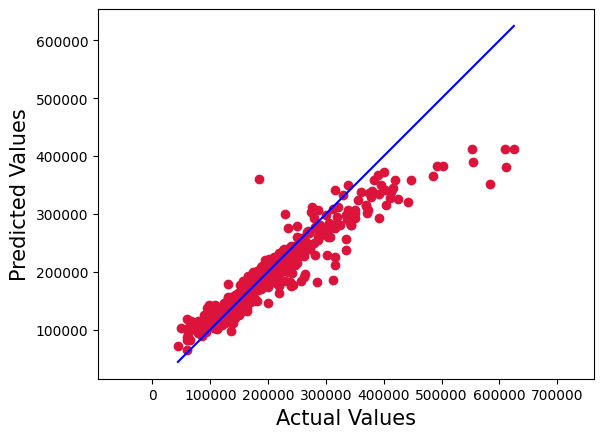

In [32]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\revex\AppData\Local\Temp\ipykernel_15732\1606234793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


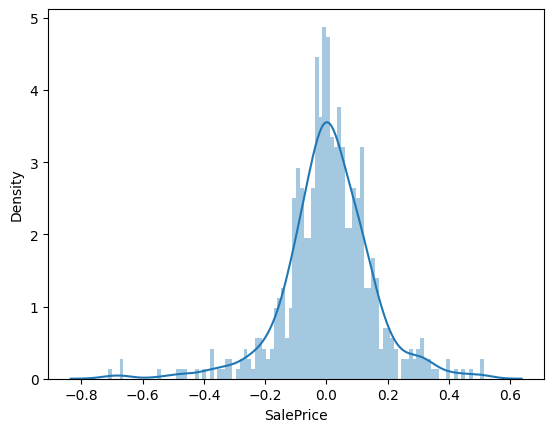

In [33]:
sb.distplot((y_test-rfr_pred),bins=100); 